## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`


### EDA
* import packages
* Load the data
* Look at the `final_price` variable. Does it have a long tail? 

In [79]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [81]:
# Read data to Dataframe

df =pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")

df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


- Normalize the column names

In [82]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [83]:
df.shape

(2160, 12)

<Axes: xlabel='final_price', ylabel='Count'>

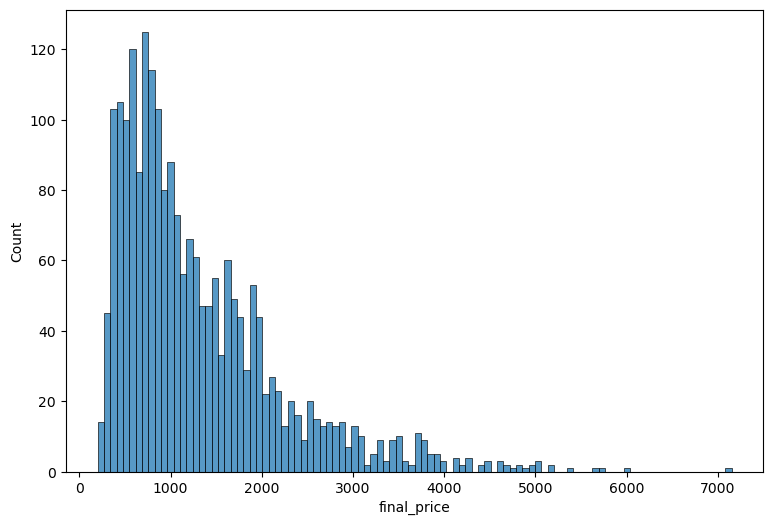

In [84]:
plt.figure(figsize=(9, 6))
sns.histplot(df.final_price, bins=100)

<Axes: xlabel='final_price', ylabel='Count'>

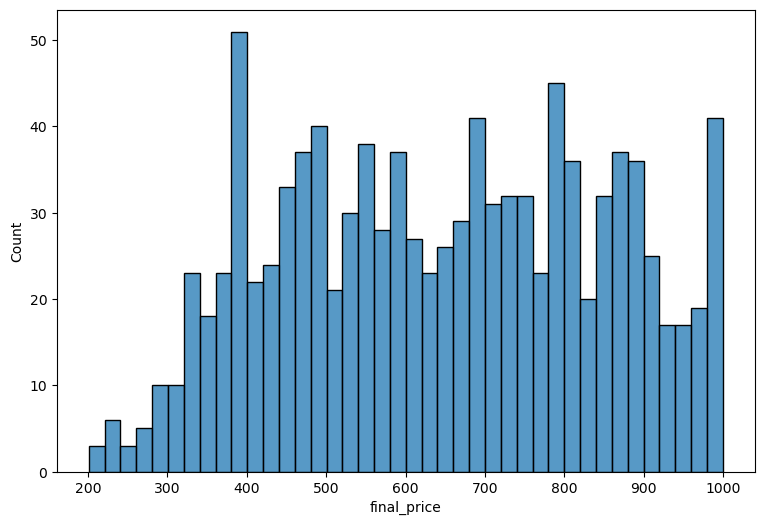

In [85]:
plt.figure(figsize=(9, 6))
sns.histplot(df.final_price[df.final_price < 1000], bins=40)

Yes, it seems there is a long tail.

### Features

For the rest of the homework, we use this values


* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [86]:
features =['ram', 
           'storage',           
           'screen',            
           'final_price'    
]

In [131]:
df = df[features]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [132]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [133]:
df.ram.median()

16.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [185]:
SEED = 42


In [186]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n -n_val - n_test

print(n, n_train, n_val, n_test)

assert n == (n_train + n_val + n_test)

2160 1296 432 432


In [187]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [188]:
np.random.seed(seed=SEED)
np.random.shuffle(idx)

In [189]:
# re assign the shuffled data 

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [190]:
#  check the length of the split 

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [191]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [192]:
#  reset the index of the new DF
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [193]:
# Check the data again 

df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [194]:
# Try to elimilate the long tail by bringing the value closer to each other on the final price using the `log1p` method

# assign your y value (indepedent variable)

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [195]:
# del the colums 

del df_train['final_price'],  df_val['final_price'], df_test['final_price']

In [196]:
#  check the data again to see changes
df_train.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [197]:
# check the y train data 

y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [198]:
base = list(df_train.columns.values)
base

['ram', 'storage', 'screen']

In [199]:
#  create a function to fill missing value with 0

def prepare_X(df, value=0):
    df_num = df[base]
    df_num = df_num.fillna(value)
    X = df_num.values
    return X

In [200]:
#  train the data with linear regression

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_ful = XTX_inv.dot(X.T).dot(y)

    return w_ful[0], w_ful[1:]

In [201]:
#  create a RSME function

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [204]:
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [205]:
X_train = prepare_X(df_train, 0)

In [206]:
X_train.shape

(1296, 3)

In [207]:
w0, w = train_linear_regression(X_train, y_train)

In [208]:
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score_zero = rmse(y_val, y_pred)
round(score_zero, 2)

0.43

Now, let's try to fill missing value with mean value

In [209]:
mean_val = df_train.screen.mean()
mean_val

15.163534416086618

In [210]:
X_train = prepare_X(df_train, mean_val)
w0, w = train_linear_regression(X_train, y_train)

In [211]:
X_val = prepare_X(df_val, mean_val)
y_pred = w0 + X_val.dot(w)
score_mean =rmse(y_val, y_pred)
round(score_mean, 2)

0.43

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [212]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [213]:
scores = {}
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)


    scores[r] = round(score, 2)
    
    print(f'r={r}: w0={w0}, rmse={score}')

r=0: w0=6.7271637061124565, rmse=0.4288635315474416
r=0.01: w0=6.721004333260311, rmse=0.4288516360534088
r=0.1: w0=6.666075503828241, rmse=0.42877560097076456
r=1: w0=6.162616499461121, rmse=0.4305932989743414
r=5: w0=4.616086176497502, rmse=0.4632095257580652
r=10: w0=3.5167547207936254, rmse=0.507565776923692
r=100: w0=0.6849263362660534, rmse=0.673502606172582


In [214]:
scores

{0: 0.43, 0.01: 0.43, 0.1: 0.43, 1: 0.43, 5: 0.46, 10: 0.51, 100: 0.67}

In [215]:
print(f'The smallest r is {min(scores, key=scores.get)}.')

The smallest r is 0.


 ### Question 5  

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [216]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [217]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed=seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)
    
    del df_train['final_price'], df_val['final_price'], df_test['final_price']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f'seed={seed}: w0={w0}, rmse={score}')
    scores.append(score)

std = np.std(scores)
print(f'std = {round(std, 3)}')

seed=0: w0=6.572550232271579, rmse=0.43004215694158965
seed=1: w0=6.750720484984187, rmse=0.4520794495247242
seed=2: w0=6.632127478045767, rmse=0.4462625574236662
seed=3: w0=6.651036507373452, rmse=0.4464515565727131
seed=4: w0=6.685700424342468, rmse=0.4199805419364144
seed=5: w0=6.655019237483877, rmse=0.4254576323418724
seed=6: w0=6.896746475861467, rmse=0.4488322872387867
seed=7: w0=6.554102037367292, rmse=0.4309159875904646
seed=8: w0=6.608907527823908, rmse=0.4428849183283987
seed=9: w0=6.722879421950617, rmse=0.40840334262399886
std = 0.014


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [174]:
SEED = 9

In [175]:
# Calculate mean
idx = np.arange(n)
np.random.seed(seed=SEED)
np.random.shuffle(idx)
    
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)
    
del df_train['final_price'], df_val['final_price'], df_test['final_price']

In [176]:

df_full_train = pd.concat([df_train, df_val])

In [177]:
df_full_train = df_full_train.reset_index(drop=True)

In [178]:
X_full_train = prepare_X(df_full_train, 0)

In [179]:
y_full_train = np.concatenate([y_train, y_val])

In [180]:
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.6]])

In [181]:
y_full_train

array([7.37393285, 7.20785987, 6.30991828, ..., 6.74523635, 6.56939727,
       6.65930674])

In [182]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [218]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f'RMSE_test = {round(score, 2)}')

RMSE_test = 0.46


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw02
* If your answer doesn't match options exactly, select the closest one